<font color="#CA3532"><h1 align="left">**Aprendizaje por Refuerzo**</h1></font>
<font color="#6E6E6E"><h2 align="left">**Multiarmed Bandits Contextuales**</h2></font>

# **Multiarmed bandits para Credit Scoring**

El objetivo es construir un sistema automático de aprendizaje por refuerzo para gestionar un sistema de concesión de créditos.
La idea es que cuando un cliente contacte con el banco para solicitar un crédito, el sistema se lo conceda (acción 1) o no (acción 0).
Por tanto el sistema de aprendizaje por refuerzo tiene **dos posibles acciones**.

Por otra parte, el reward obtenido es:

- 0 si el sistema decide no ofrecerle el crédito al cliente
- 1 si se le ofrece el crédito y **lo paga**
- -10 si se le ofrece crédito y **no lo paga**

Para construir el sistema disponemos del siguiente dataset: https://drive.google.com/file/d/1TdTDAjndt5sn_7HKwc1PifcaQTRNHzkR/view?usp=sharing


A continuación se descarga y muestra:

In [ ]:
COLAB = True

In [ ]:
import pandas as pd
pd.options.display.max_colwidth = 200

# Descargamos dataset:
aux = "'https://docs.google.com/uc?export=download&id=1000WA5q8DTZ68uoPaXddJ1TLJPBsIZpr&confirm=t'"
!wget -q $aux -O ./cs.csv
aux = "'https://docs.google.com/uc?export=download&id=11SdrmYpGwW7xC6Nooe6aRBkORBnirrkm&confirm=t'"
!wget -q $aux -O ./DataDictionary.csv

**Información sobre cada variable:**

In [ ]:
info_variables = pd.read_csv("DataDictionary.csv", sep=";").set_index("Variable Name")
info_variables

,Unnamed: 0,Description,Type
Variable Name,,,
SeriousDlqin2yrs,0,Person experienced 90 days past due delinquency or worse,Y/N
RevolvingUtilizationOfUnsecuredLines,1,Total balance on credit cards and personal lines of credit except real estate and no installment debt like car loans divided by the sum of credit limits,percentage
age,2,Age of borrower in years,integer
NumberOfTime30-59DaysPastDueNotWorse,3,Number of times borrower has been 30-59 days past due but no worse in the last 2 years.,integer
DebtRatio,4,"Monthly debt payments, alimony,living costs divided by monthy gross income",percentage
MonthlyIncome,5,Monthly income,real
NumberOfOpenCreditLinesAndLoans,6,Number of Open loans (installment like car loan or mortgage) and Lines of credit (e.g. credit cards),integer
NumberOfTimes90DaysLate,7,Number of times borrower has been 90 days or more past due.,integer
NumberRealEstateLoansOrLines,8,Number of mortgage and real estate loans including home equity lines of credit,integer


**Base de datos:**

In [ ]:
df = pd.read_csv("./cs.csv")
df.head(10)

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
5,0,0.213179,74,0,0.375607,3500.0,3,0,1,0,1.0
6,0,0.305682,57,0,5710.000000,NaN,8,0,3,0,0.0
7,0,0.754464,39,0,0.209940,3500.0,8,0,0,0,0.0
8,0,0.116951,27,0,46.000000,NaN,2,0,0,0,NaN
9,0,0.189169,57,0,0.606291,23684.0,9,0,4,0,2.0


In [ ]:
df.describe().T[["count", "min", "max", "mean", "std"]]

,count,min,max,mean,std
SeriousDlqin2yrs,150000.0,0.0,1.0,0.066840,0.249746
RevolvingUtilizationOfUnsecuredLines,150000.0,0.0,50708.0,6.048438,249.755371
age,150000.0,0.0,109.0,52.295207,14.771866
NumberOfTime30-59DaysPastDueNotWorse,150000.0,0.0,98.0,0.421033,4.192781
DebtRatio,150000.0,0.0,329664.0,353.005076,2037.818523
MonthlyIncome,120269.0,0.0,3008750.0,6670.221237,14384.674215
NumberOfOpenCreditLinesAndLoans,150000.0,0.0,58.0,8.452760,5.145951
NumberOfTimes90DaysLate,150000.0,0.0,98.0,0.265973,4.169304
NumberRealEstateLoansOrLines,150000.0,0.0,54.0,1.018240,1.129771
NumberOfTime60-89DaysPastDueNotWorse,150000.0,0.0,98.0,0.240387,4.155179


In [ ]:
df.isna().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

In [ ]:
(df["MonthlyIncome"].isna() & df["NumberOfDependents"].isna()).sum()

3924

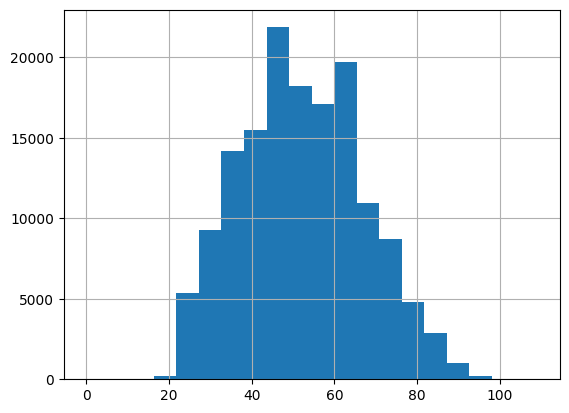

In [ ]:
df["age"].hist(bins=20);

In [ ]:
df["NumberOfTime30-59DaysPastDueNotWorse"].value_counts()

0     126018
1      16033
2       4598
3       1754
4        747
5        342
98       264
6        140
7         54
8         25
9         12
96         5
10         4
12         2
13         1
11         1
Name: NumberOfTime30-59DaysPastDueNotWorse, dtype: int64

In [ ]:
# limpieza básica:
#
# 1- Eliminamos filas con missing values (MonthlyIncome y NumberOfDependents)
# 2- Nos quedamos solo con personas de 18 a 70 años (incluidos)
# 3- Eliminamos filas que tengan 96 o 98 en columnas de retraso
#    (NumberOfTime30-59DaysPastDueNotWorse, NumberOfTime60-89DaysPastDueNotWorse,
#     NumberOfTimes90DaysLate)

df.dropna(inplace=True)
df = df[ (df["age"]>=18) & (df["age"]<=70) ]

df = df[ ~df["NumberOfTime30-59DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTime60-89DaysPastDueNotWorse"].isin([96, 98]) ]
df = df[ ~df["NumberOfTimes90DaysLate"].isin([96, 98]) ]

In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeriousDlqin2yrs,107883.0,0.073728,0.261329,0.0,0.000000,0.000000,0.000000,1.0
RevolvingUtilizationOfUnsecuredLines,107883.0,6.262285,268.425237,0.0,0.042982,0.206481,0.617870,50708.0
age,107883.0,48.343835,11.909195,21.0,39.000000,49.000000,58.000000,70.0
NumberOfTime30-59DaysPastDueNotWorse,107883.0,0.276781,0.739606,0.0,0.000000,0.000000,0.000000,13.0
DebtRatio,107883.0,27.426863,395.986811,0.0,0.162018,0.308917,0.493251,60212.0
MonthlyIncome,107883.0,6800.816625,14941.921271,0.0,3500.000000,5500.000000,8344.000000,3008750.0
NumberOfOpenCreditLinesAndLoans,107883.0,8.774265,5.155074,0.0,5.000000,8.000000,11.000000,58.0
NumberOfTimes90DaysLate,107883.0,0.098588,0.509666,0.0,0.000000,0.000000,0.000000,17.0
NumberRealEstateLoansOrLines,107883.0,1.095233,1.157615,0.0,0.000000,1.000000,2.000000,54.0
NumberOfTime60-89DaysPastDueNotWorse,107883.0,0.072106,0.348840,0.0,0.000000,0.000000,0.000000,11.0


La columna **SeriousDlqin2yrs** es 0 si el cliente paga el crédito, y 1 si no lo paga.

Ahora dividimos el dataset en training y test:

In [ ]:
from sklearn.model_selection import train_test_split

df_train, df_test = train_test_split(df, random_state=1, test_size=0.3, stratify=df["SeriousDlqin2yrs"])

In [ ]:
# frecuencia de impagos en training y test (en tanto por 1):
df_train["SeriousDlqin2yrs"].mean(), df_test["SeriousDlqin2yrs"].mean()

(0.07373076617495167, 0.073721612853391)

In [ ]:
# Defino clase clientes:

class clientes:
    def __init__(self, df): # self: parámetros internos
        # mi clase va a tener dos parámetros internos:
        # i, df
        self.i = -1 # i: contador (de clientes); índice al último cliente mostrado
        self.df = df
    def cliente(self): # va a simular que llega un cliente
        self.i = self.i + 1
        if self.i == len(self.df):
            self.i = 0
    def get_context(self): # va a extraer datos de ese cliente
        return self.df.iloc[self.i].drop("SeriousDlqin2yrs")
    def get_reward(self, accion): # reward con ese cliente
        # calculo reward:
        if accion==0: # no se da crédito
            return 0
        # se da crédito:
        if self.df.iloc[self.i]["SeriousDlqin2yrs"] == 1: # no paga
            return -1
        return 1 # paga

In [ ]:
# clientes: una clase
# cl_train: una instancia de esa clase
# cl_test: otra instancia de esa clase
#
# podemos ver cl_train como una "caja" donde hemos
# metido el dataset de entrenamiento y va a haber
# métodos que me permiten interaccionar con él
#
# Lo mismo con cl_test, pero para los datos de test

cl_train = clientes(df_train)
cl_test  = clientes(df_test)

In [ ]:
cl_train.cliente() # simulo que llega un cliente nuevo

In [ ]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        0.064833
age                                        59.000000
NumberOfTime30-59DaysPastDueNotWorse        0.000000
DebtRatio                                   0.156957
MonthlyIncome                           16666.000000
NumberOfOpenCreditLinesAndLoans             5.000000
NumberOfTimes90DaysLate                     0.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 135262, dtype: float64

In [ ]:
cl_train.get_context().values

array([6.48325870e-02, 5.90000000e+01, 0.00000000e+00, 1.56956861e-01,
       1.66660000e+04, 5.00000000e+00, 0.00000000e+00, 1.00000000e+00,
       0.00000000e+00, 2.00000000e+00])

In [ ]:
cl_train.cliente()
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines       0.209079
age                                       30.000000
NumberOfTime30-59DaysPastDueNotWorse       0.000000
DebtRatio                                  0.129946
MonthlyIncome                           2400.000000
NumberOfOpenCreditLinesAndLoans            7.000000
NumberOfTimes90DaysLate                    0.000000
NumberRealEstateLoansOrLines               0.000000
NumberOfTime60-89DaysPastDueNotWorse       0.000000
NumberOfDependents                         0.000000
Name: 14308, dtype: float64

In [ ]:
cl_train.get_reward(1)

1

# **Tareas a realizar**

1- Calcula la evolución del reward total, regret total de un algoritmo aleatorio en training. Calcula en otra gráfica la evolución de su reward promedio y regret promedio.

2- Entrena un multiarmed bandit contextual lineal en training. Calcula las mismas métricas que en el punto 1

3- Calcula, para algunos clientes de training, las Q dadas por el modelo para cada acción. Chequea si obtienes los mismos valores calculándolos tú. Chequea si la acción elegida por el modelo es la de mayor Q.

4- Calcula en test el rendimiento del algoritmo de multiarmed bandit. Compáralo con el grupo de control de test (reserva un 10% de clientes en test como grupo de control).

5- Obtén la interpretabilidad del modelo. ¿En qué variables se está fijando para decidir?

6- (Opcional). Trata de optimizar tu sistema haciendo selección de variables.

### Tarea 1

In [ ]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt

100%|██████████| 10000/10000 [00:02<00:00, 4582.14it/s]


Reward promedio: 0.4296


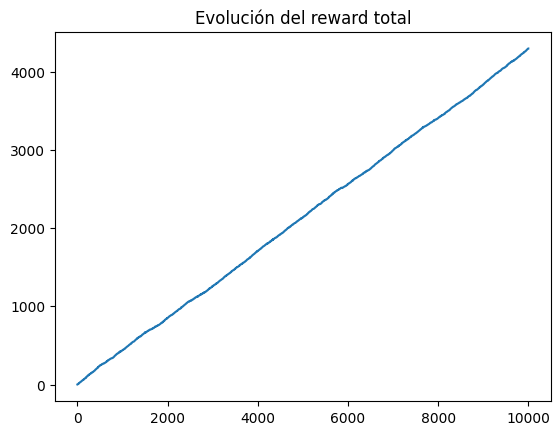

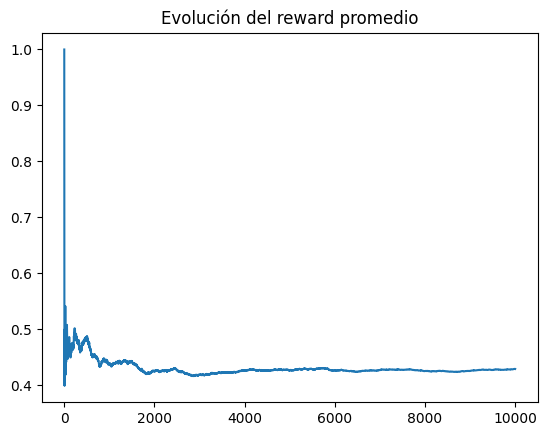

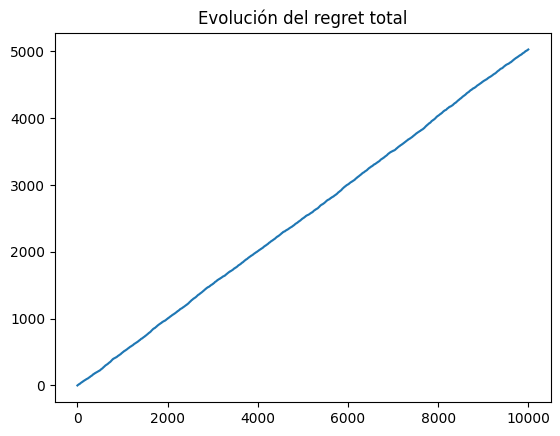

In [ ]:
N = 10000

historico_reward_promedio = []
historico_reward_total    = []
historico_regret_total    = []
reward_total = 0
regret_total = 0
for i in tqdm(range(N)):
  cl_train.cliente() # cliente con el que contacto
  accion = np.random.choice(2)
  reward = cl_train.get_reward(accion)

  reward_total += reward
  ideal = max(cl_train.get_reward(0), cl_train.get_reward(1))
  regret = ideal - reward
  regret_total += regret
  historico_reward_total.append(reward_total)
  historico_reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones
  historico_regret_total.append(regret_total)

print("Reward promedio:", reward_total/N)
plt.plot(historico_reward_total)
plt.title("Evolución del reward total")
plt.show()
plt.plot(historico_reward_promedio)
plt.title("Evolución del reward promedio");
plt.show()
plt.plot(historico_regret_total)
plt.title("Evolución del regret total");

In [ ]:
historico_regret_total[-1] / N

0.5027

### Tarea 2

In [ ]:
if COLAB:
    from google_drive_downloader import GoogleDriveDownloader as gdd

    gdd.download_file_from_google_drive(file_id='1fCnGzS5U_x-k_03op_XJkHVS4jpvjSxS',
                                        dest_path='./spacebandits.zip', unzip=True)

In [ ]:
from space_bandits import LinearBandits

n_features = 10
n_acciones = 2

100%|██████████| 10000/10000 [01:18<00:00, 127.77it/s]


Reward promedio: 0.8417


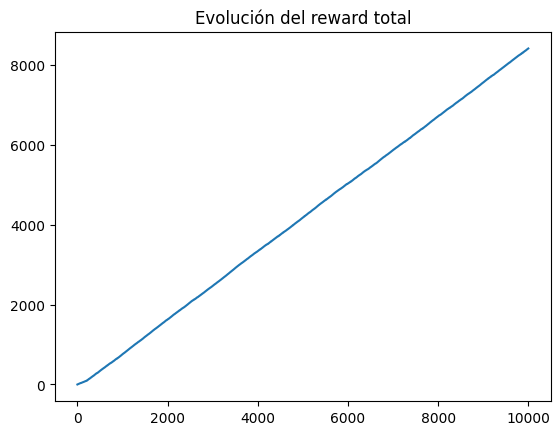

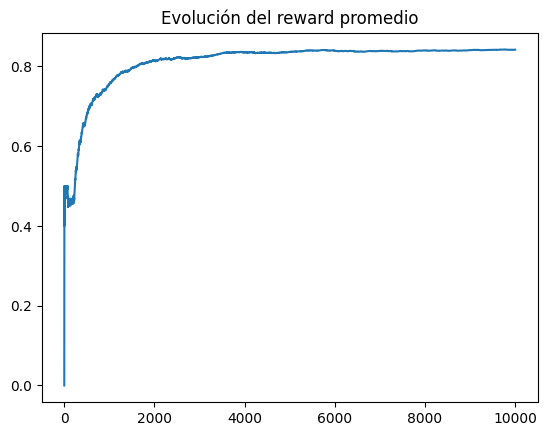

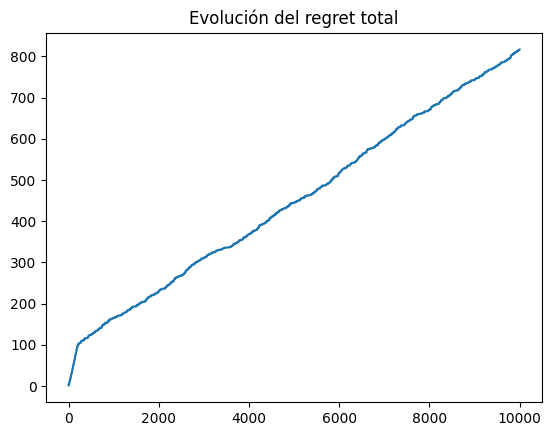

In [ ]:
N = 10000

agente = LinearBandits(n_acciones, n_features, initial_pulls=100) # initial_pulls: duración de la fase de exploración pura

historico_reward_promedio = []
historico_reward_total    = []
historico_regret_total    = []
reward_total = 0
regret_total = 0
for i in tqdm(range(N)):
  cl_train.cliente() # cliente con el que contacto
  contexto = cl_train.get_context().values
  accion = agente.action(contexto)
  reward = cl_train.get_reward(accion)
  agente.update(contexto, accion, reward)

  reward_total += reward
  ideal = max(cl_train.get_reward(0), cl_train.get_reward(1))
  regret = ideal - reward
  regret_total += regret
  historico_reward_total.append(reward_total)
  historico_reward_promedio.append(reward_total/(i+1)) # i+1 es el número de iteraciones
  historico_regret_total.append(regret_total)

print("Reward promedio:", reward_total/N)
plt.plot(historico_reward_total)
plt.title("Evolución del reward total")
plt.show()
plt.plot(historico_reward_promedio)
plt.title("Evolución del reward promedio");
plt.show()
plt.plot(historico_regret_total)
plt.title("Evolución del regret total");

### Tarea 3

In [ ]:
cl_train.cliente()

In [ ]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        1.381546
age                                        46.000000
NumberOfTime30-59DaysPastDueNotWorse        2.000000
DebtRatio                                   0.119018
MonthlyIncome                           10300.000000
NumberOfOpenCreditLinesAndLoans             7.000000
NumberOfTimes90DaysLate                     1.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 25497, dtype: float64

In [ ]:
contexto = cl_train.get_context().values
agente.action(contexto)

1

In [ ]:
agente.expected_values(contexto)

array([0.        , 0.10756723])

In [ ]:
agente.mu

[array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 array([-2.12330532e-01,  1.52022108e-03, -1.00176446e-01,  8.95282464e-07,
        -2.20488593e-08, -3.55789305e-03, -3.93357681e-01, -1.77286523e-02,
        -2.02886277e-01, -4.59556325e-03,  9.76744091e-01])]

In [ ]:
# acción 1:
agente.mu[1][-1] + (agente.mu[1][:-1]*contexto).sum()

0.10756723432857063

In [ ]:
# acción 0:
agente.mu[0][-1] + (agente.mu[0][:-1]*contexto).sum()

0.0

### Tarea 4

### Tarea 5

In [ ]:
# Primero creo una tabla donde tengo clientes y las predicciones del modelo en ellos

df_subrogado = df_test.drop("SeriousDlqin2yrs", axis=1)
df_subrogado

,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
86820,0.429702,59,3,0.201624,13420.0,13,0,2,0,2.0
63852,0.717724,53,2,0.508987,8400.0,20,0,2,0,1.0
109304,1.000000,33,0,0.281594,13000.0,11,0,1,1,2.0
131988,0.889311,57,0,0.273563,6747.0,5,1,1,0,1.0
125320,0.271875,53,1,0.510943,9000.0,10,0,2,0,4.0
...,...,...,...,...,...,...,...,...,...,...
91608,1.000000,29,0,0.282265,1200.0,2,2,0,0,1.0
123805,0.687045,31,2,2.079739,764.0,6,0,1,0,0.0
8313,0.132443,29,0,0.100131,3824.0,5,0,0,0,0.0
145560,0.868331,63,0,0.671443,3000.0,12,0,0,0,2.0


In [ ]:
df_subrogado.columns

Index(['RevolvingUtilizationOfUnsecuredLines', 'age',
       'NumberOfTime30-59DaysPastDueNotWorse', 'DebtRatio', 'MonthlyIncome',
       'NumberOfOpenCreditLinesAndLoans', 'NumberOfTimes90DaysLate',
       'NumberRealEstateLoansOrLines', 'NumberOfTime60-89DaysPastDueNotWorse',
       'NumberOfDependents'],
      dtype='object')

In [ ]:
cl_train.get_context()

RevolvingUtilizationOfUnsecuredLines        1.381546
age                                        46.000000
NumberOfTime30-59DaysPastDueNotWorse        2.000000
DebtRatio                                   0.119018
MonthlyIncome                           10300.000000
NumberOfOpenCreditLinesAndLoans             7.000000
NumberOfTimes90DaysLate                     1.000000
NumberRealEstateLoansOrLines                1.000000
NumberOfTime60-89DaysPastDueNotWorse        0.000000
NumberOfDependents                          2.000000
Name: 25497, dtype: float64

In [ ]:
acciones_predichas = []
contextos = df_subrogado.values
for x in contextos: # me recorro fila a fila el dataset subrogado
  accion = agente.action(x)
  acciones_predichas.append(accion)

In [ ]:
len(acciones_predichas)

32365

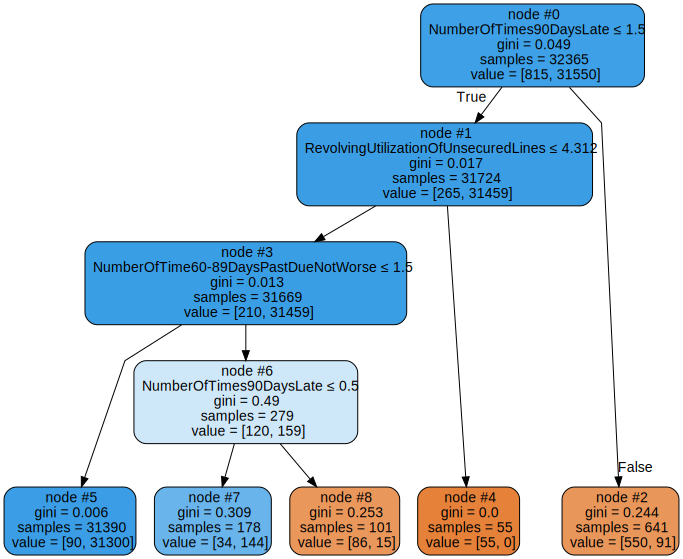

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source

startbold = '\033[1m'
endbold = '\033[0m'

clf = DecisionTreeClassifier(
    #max_depth=1,
    #min_samples_split=0.3, # mínimo número de casos en un nodo para partirlo. 0.3 = 30% del total de casos
    #min_samples_leaf=0.2,  # mínimo número de casos en nodo hoja. 0.2 = 20% del total de casos
    max_leaf_nodes=5, # máximo número de nodos hoja
    #min_weight_fraction_leaf=0.05,
    #min_impurity_decrease=0.15
    )

clf = clf.fit(contextos, acciones_predichas)
# clf.classes_
attributes_names = df_subrogado.columns

display(Source( export_graphviz(clf, out_file=None,
                                feature_names=attributes_names,
                                #class_names=cluster_names,
                                filled=True, rounded=True,
                                special_characters=True,
                                impurity=True,
                                leaves_parallel=True,
                                rotate=False,
                                node_ids=True)))

In [ ]:
np.unique(acciones_predichas, return_counts=True)

(array([0, 1]), array([  815, 31550]))

In [ ]:
len(df_train)

75518

In [ ]:
penalty = -10
((penalty*(df_train["SeriousDlqin2yrs"]==1)).sum() + (1*(df_train["SeriousDlqin2yrs"]==0)).sum()) / len(df_train)

0.18896157207553166